In [1]:
#Import everything
import Main.test_manifold_algorithms as tma
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from Helpers.regression_helpers import *

# Baseline Visualization

In [ ]:
baselines_cross = pd.read_csv("/yunity/arusty/Graph-Manifold-Alignment/Results/RegressionData/BaselineData.csv")
baselines = pd.read_csv("/yunity/arusty/Graph-Manifold-Alignment/Results/RegressionData/BaselineDataOnSample.csv")
baselines.sample(5)

,csv_file,split,KNN,A_Classification_Score,B_Classification_Score
539,Parkinsons,random,1064,0.327420,0.252167
80,Hydrodynamics,distort,2,0.944973,0.895982
16,ComputerHardware,distort,32,0.600997,0.600331
5,ComputerHardware,even,27,0.614619,0.595601
612,ConcreteCompressiveStrength,random,44,0.234997,0.383793


In [3]:
baselines_grouped = baselines.groupby(by = ["csv_file", "split"]).max().drop(columns = ["KNN"]).reset_index()
baselines_grouped[baselines_grouped["csv_file"] == "Hydrodynamics"]

,csv_file,split,A_Classification_Score,B_Classification_Score
45,Hydrodynamics,distort,0.944973,0.895982
46,Hydrodynamics,even,0.000619,0.988501
47,Hydrodynamics,random,-0.002573,0.940687
48,Hydrodynamics,skewed,-0.000754,0.983942
49,Hydrodynamics,turn,0.944973,0.944830


<Axes: xlabel='csv_file'>

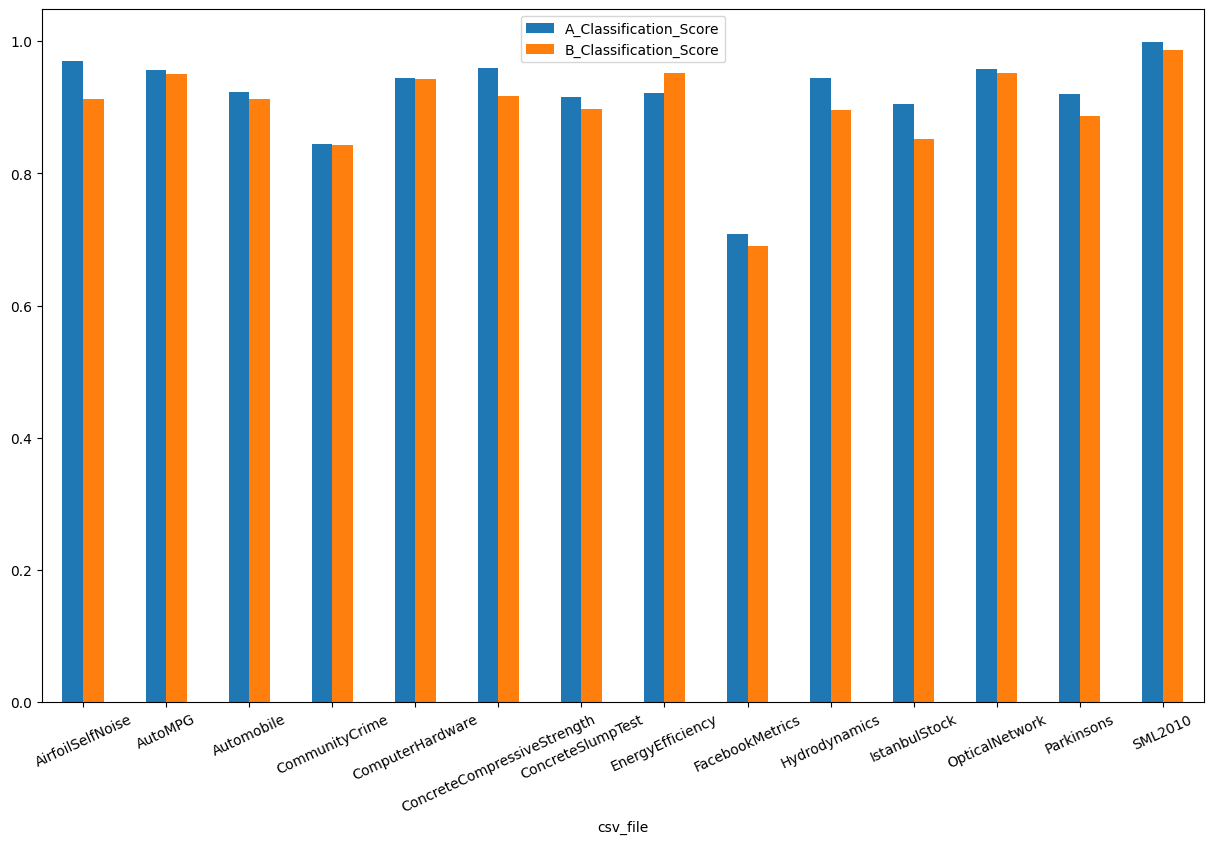

In [4]:
baselines_grouped[baselines_grouped["split"] == "distort"].set_index("csv_file").plot(kind = "bar", subplots=False, figsize=(15,9), rot= 25)
#Keep in mind that these are trained on one domain, then tested on the other. 

# Model Comparison

In [5]:
reg_df = read_json_files_to_dataframe("/yunity/arusty/Graph-Manifold-Alignment/Results/RegressionData")
print(f"File Length: {len(reg_df)}")
reg_df.sample(5)


File Length: 1155


,method,csv_file,split,Percent_of_Anchors,Best_Params,CE,FOSCTTM,Random Forest OOB,Random Forest Emb,Nearest Neighbor,Nearest Neighbor (F1 score or RMSE),Random Forest (F1 score or RMSE),GRAE,Parameter STD
155,MASH-,Hydrodynamics,distort,0.3,"{'knn': 65, 'page_rank': 'off-diagonal', 'DTM'...","{'42': 0.6147816833486851, '1738': 0.677681898...","{'42': 0.015058399392814979, '1738': 0.0156908...","{'42': 0.6652877618038351, '1738': 0.643969043...","{'42': 0.4156523275038707, '1738': 0.461309636...","{'42': 0.1865025160532775, '1738': 0.336187056...","{'42': 0.725195827026992, '1738': 0.8872549203...","{'42': 0.6146287182822007, '1738': 0.799273035...","{'42': {'RF-OOB': 0.8074173407705441, 'KNN': 0...","{'knn': 0.23852051724045595, 'page_rank': 0.00..."
449,RF-SPUD,OpticalNetwork,even,0.3,"{'knn': 15, 'OD_method': 'default', 'agg_metho...",{'42': -0.13459304128843397},{'42': 0.0},{'42': -0.011293126567481826},{'42': -0.05184815708848545},{'42': 0.031044700307742645},{'42': 0.9942602627620021},{'42': 1.0359164663843266},"{'42': {'RF-OOB': 0.06467011514011678, 'KNN': ...",{}
3,MALI-RF,ComputerHardware,turn,0.3,"{'knn': 2, 'mu': 0.5, 't': 3, 'transition_only...","{'42': -0.11874092995680385, '1738': -0.145182...","{'42': 0.0679471623818136, '1738': 0.049151805...","{'42': -0.13208746791005654, '1738': -0.130708...","{'42': -0.08152049424692365, '1738': -0.724586...","{'42': -0.04025837501745744, '1738': -0.342419...","{'42': 1.430835460782978, '1738': 0.7074331748...","{'42': 1.4589367399576771, '1738': 0.801832603...","{'42': {'RF-OOB': -0.23939023670563886, 'KNN':...",{}
234,MAPA,EnergyEfficiency,turn,0.3,"{'knn': 114, 'r': 50}","{'42': 0.9476132801047847, '1738': 0.947613280...","{'42': 0.00039909478275187646, '1738': 0.00040...","{'42': 0.9811365108606707, '1738': 0.593099661...","{'42': 0.8969019593995854, '1738': 0.219174186...","{'42': 0.8770419874611214, '1738': 0.620276518...","{'42': 0.36504538109825524, '1738': 0.61346562...","{'42': 0.3342671096374453, '1738': 0.879697964...","{'42': {'RF-OOB': 0.9818335482620798, 'KNN': 0...",{}
959,MAGAN,ConcreteSlumpTest,distort,0.3,{'learning_rate': 0.001},"{'42': 0.4512675711635461, '1738': 0.416848013...","{'42': 0.0, '1738': 0.0, '5271': 0.0, '9209': ...","{'42': 0.5332380632512173, '1738': 0.410571361...","{'42': 0.6405956400862713, '1738': 0.474313857...","{'42': 0.6037059422506313, '1738': 0.677082829...","{'42': 0.5712865687084253, '1738': 0.495663039...","{'42': 0.5440476066259338, '1738': 0.632418012...","{'42': {'RF-OOB': 0.48060096478388625, 'KNN': ...",{}


In [6]:
proc_reg_df = reg_df.drop(columns = ["Best_Params", "Parameter STD"])

#Average out the random seeds
for columns in ["CE", "FOSCTTM", "Random Forest OOB", "Random Forest Emb", "Nearest Neighbor", "Nearest Neighbor (F1 score or RMSE)", "Random Forest (F1 score or RMSE)"]:
    proc_reg_df[columns] = [np.mean(list(d.values())) for d in proc_reg_df[columns].values]

proc_reg_df["Combined_Metric"] = proc_reg_df["CE"] - proc_reg_df["FOSCTTM"]
proc_reg_df = proc_reg_df.merge(baselines_grouped, how = "left")

In [7]:
proc_reg_df.sample(3)

,method,csv_file,split,Percent_of_Anchors,CE,FOSCTTM,Random Forest OOB,Random Forest Emb,Nearest Neighbor,Nearest Neighbor (F1 score or RMSE),Random Forest (F1 score or RMSE),GRAE,Combined_Metric,A_Classification_Score,B_Classification_Score
356,MAPA,SML2010,random,0.3,-0.415481,0.499907,-0.045130,-0.036332,0.038802,0.987288,1.025100,"{'42': {'RF-OOB': -0.04978980115796361, 'KNN':...",-0.915388,0.813099,0.983434
938,MALI-RF,ConcreteSlumpTest,even,0.3,-0.320964,0.045527,-0.317132,-0.115273,-0.186670,0.988576,0.958376,"{'42': {'RF-OOB': -0.04239614388274804, 'KNN':...",-0.366491,0.750760,0.778608
133,SPUD,Hydrodynamics,random,0.3,-0.183587,0.021981,0.031030,-0.043462,-0.026698,0.937280,0.948051,"{'42': {'RF-OOB': -0.23984522290052057, 'KNN':...",-0.205568,-0.002573,0.940687


In [8]:
#This helps me to see where my tests have failed
results_df = plt_methods_by_CSV_max(df = proc_reg_df, return_df=True).drop(columns = ["KEMA_RF"]) #, split = "skewed"
results_df

,csv_file,SSMA,MAGAN,DTA,SPUD,MASH,MASH-,NAMA,PCR,JLMA,MASH_RF,MALI_RF,MALI,SPUD_RF,BL_A,BL_B
0,IstanbulStock,0.674731,0.292751,0.844776,0.441662,0.661281,0.811195,0.195857,0.834900,0.730128,NaN,NaN,0.366207,NaN,0.904693,0.936911
1,Hydrodynamics,0.664402,0.532023,0.899806,0.799632,0.671012,0.706608,-0.054671,0.895496,0.796840,NaN,NaN,0.759538,NaN,0.944973,0.988501
2,CommunityCrime,0.497916,-0.024250,0.793918,0.535569,0.728064,0.723443,-0.142984,0.786104,0.740419,NaN,NaN,-0.139376,NaN,0.843871,0.843871
3,Automobile,0.757670,0.256283,0.882649,0.715318,0.734306,0.821432,0.343892,0.881048,0.804208,NaN,NaN,0.795496,NaN,0.960598,0.936047
4,OpticalNetwork,0.473332,-0.147061,0.908100,0.518772,0.747207,0.676236,-0.180715,0.910902,0.854887,NaN,NaN,0.451797,NaN,0.958096,0.958096
5,EnergyEfficiency,0.714446,0.214233,0.951794,0.874175,0.948629,0.948063,0.727009,0.947097,0.930597,NaN,NaN,0.218222,NaN,0.963113,0.966207
6,AirfoilSelfNoise,0.488030,-0.113552,0.962474,0.531724,NaN,0.581128,-0.135461,0.924405,0.848466,NaN,NaN,-0.182528,NaN,0.970140,0.966850
7,AutoMPG,0.824608,0.263139,0.937706,0.688194,NaN,0.824260,0.045526,0.926311,0.903269,NaN,NaN,0.880391,NaN,0.956483,0.956483
8,ComputerHardware,0.962834,0.096644,0.964519,0.686117,NaN,0.834393,0.045628,0.949490,0.845673,NaN,NaN,0.927786,NaN,0.944723,0.944745
9,ConcreteCompressiveStrength,0.579742,-0.171202,0.900178,0.355952,NaN,0.576587,-0.159360,0.900479,0.845669,NaN,NaN,-0.128310,NaN,0.959483,0.958591


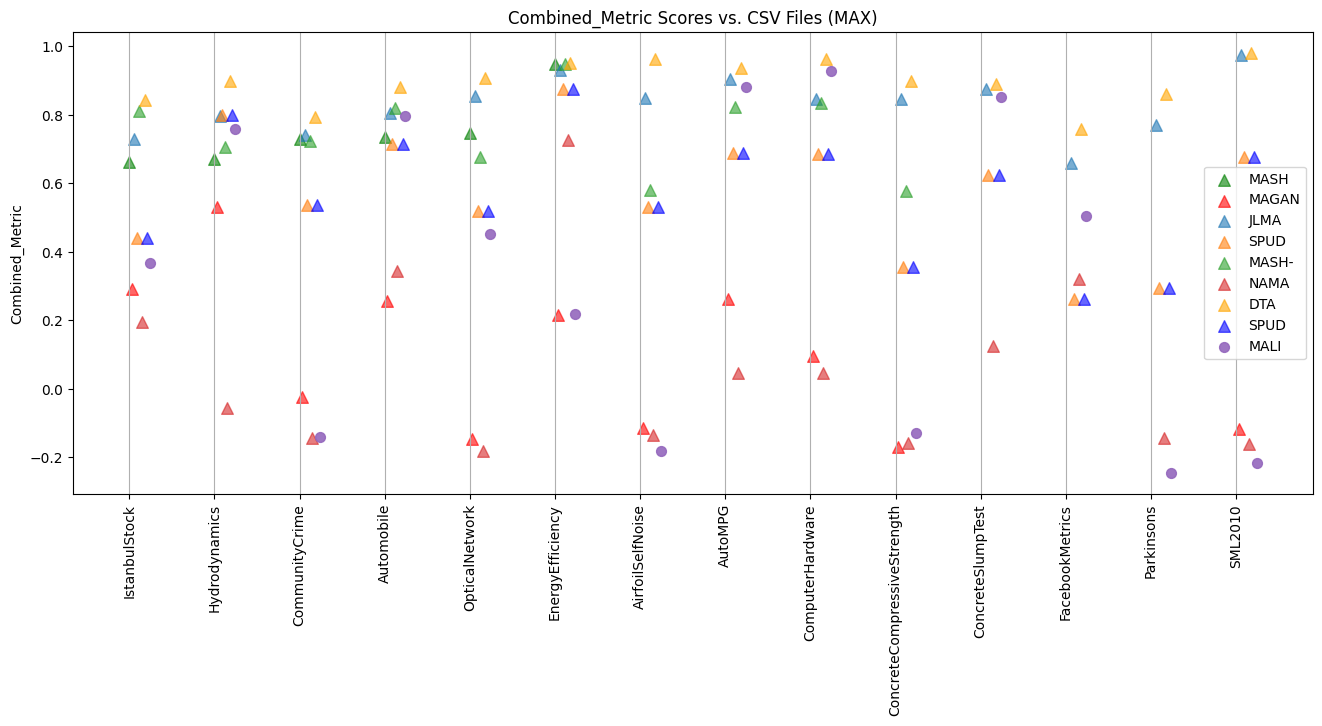

In [8]:
plt_methods_by_CSV_max(df = proc_reg_df, plot_methods=["MASH", "NAMA", "MALI", "SPUD", "MASH-", "BL_A-B", "BL_B-A", "MAGAN", "JLMA", "DTA"])

In [9]:
proc_reg_df["method"].nunique()

15

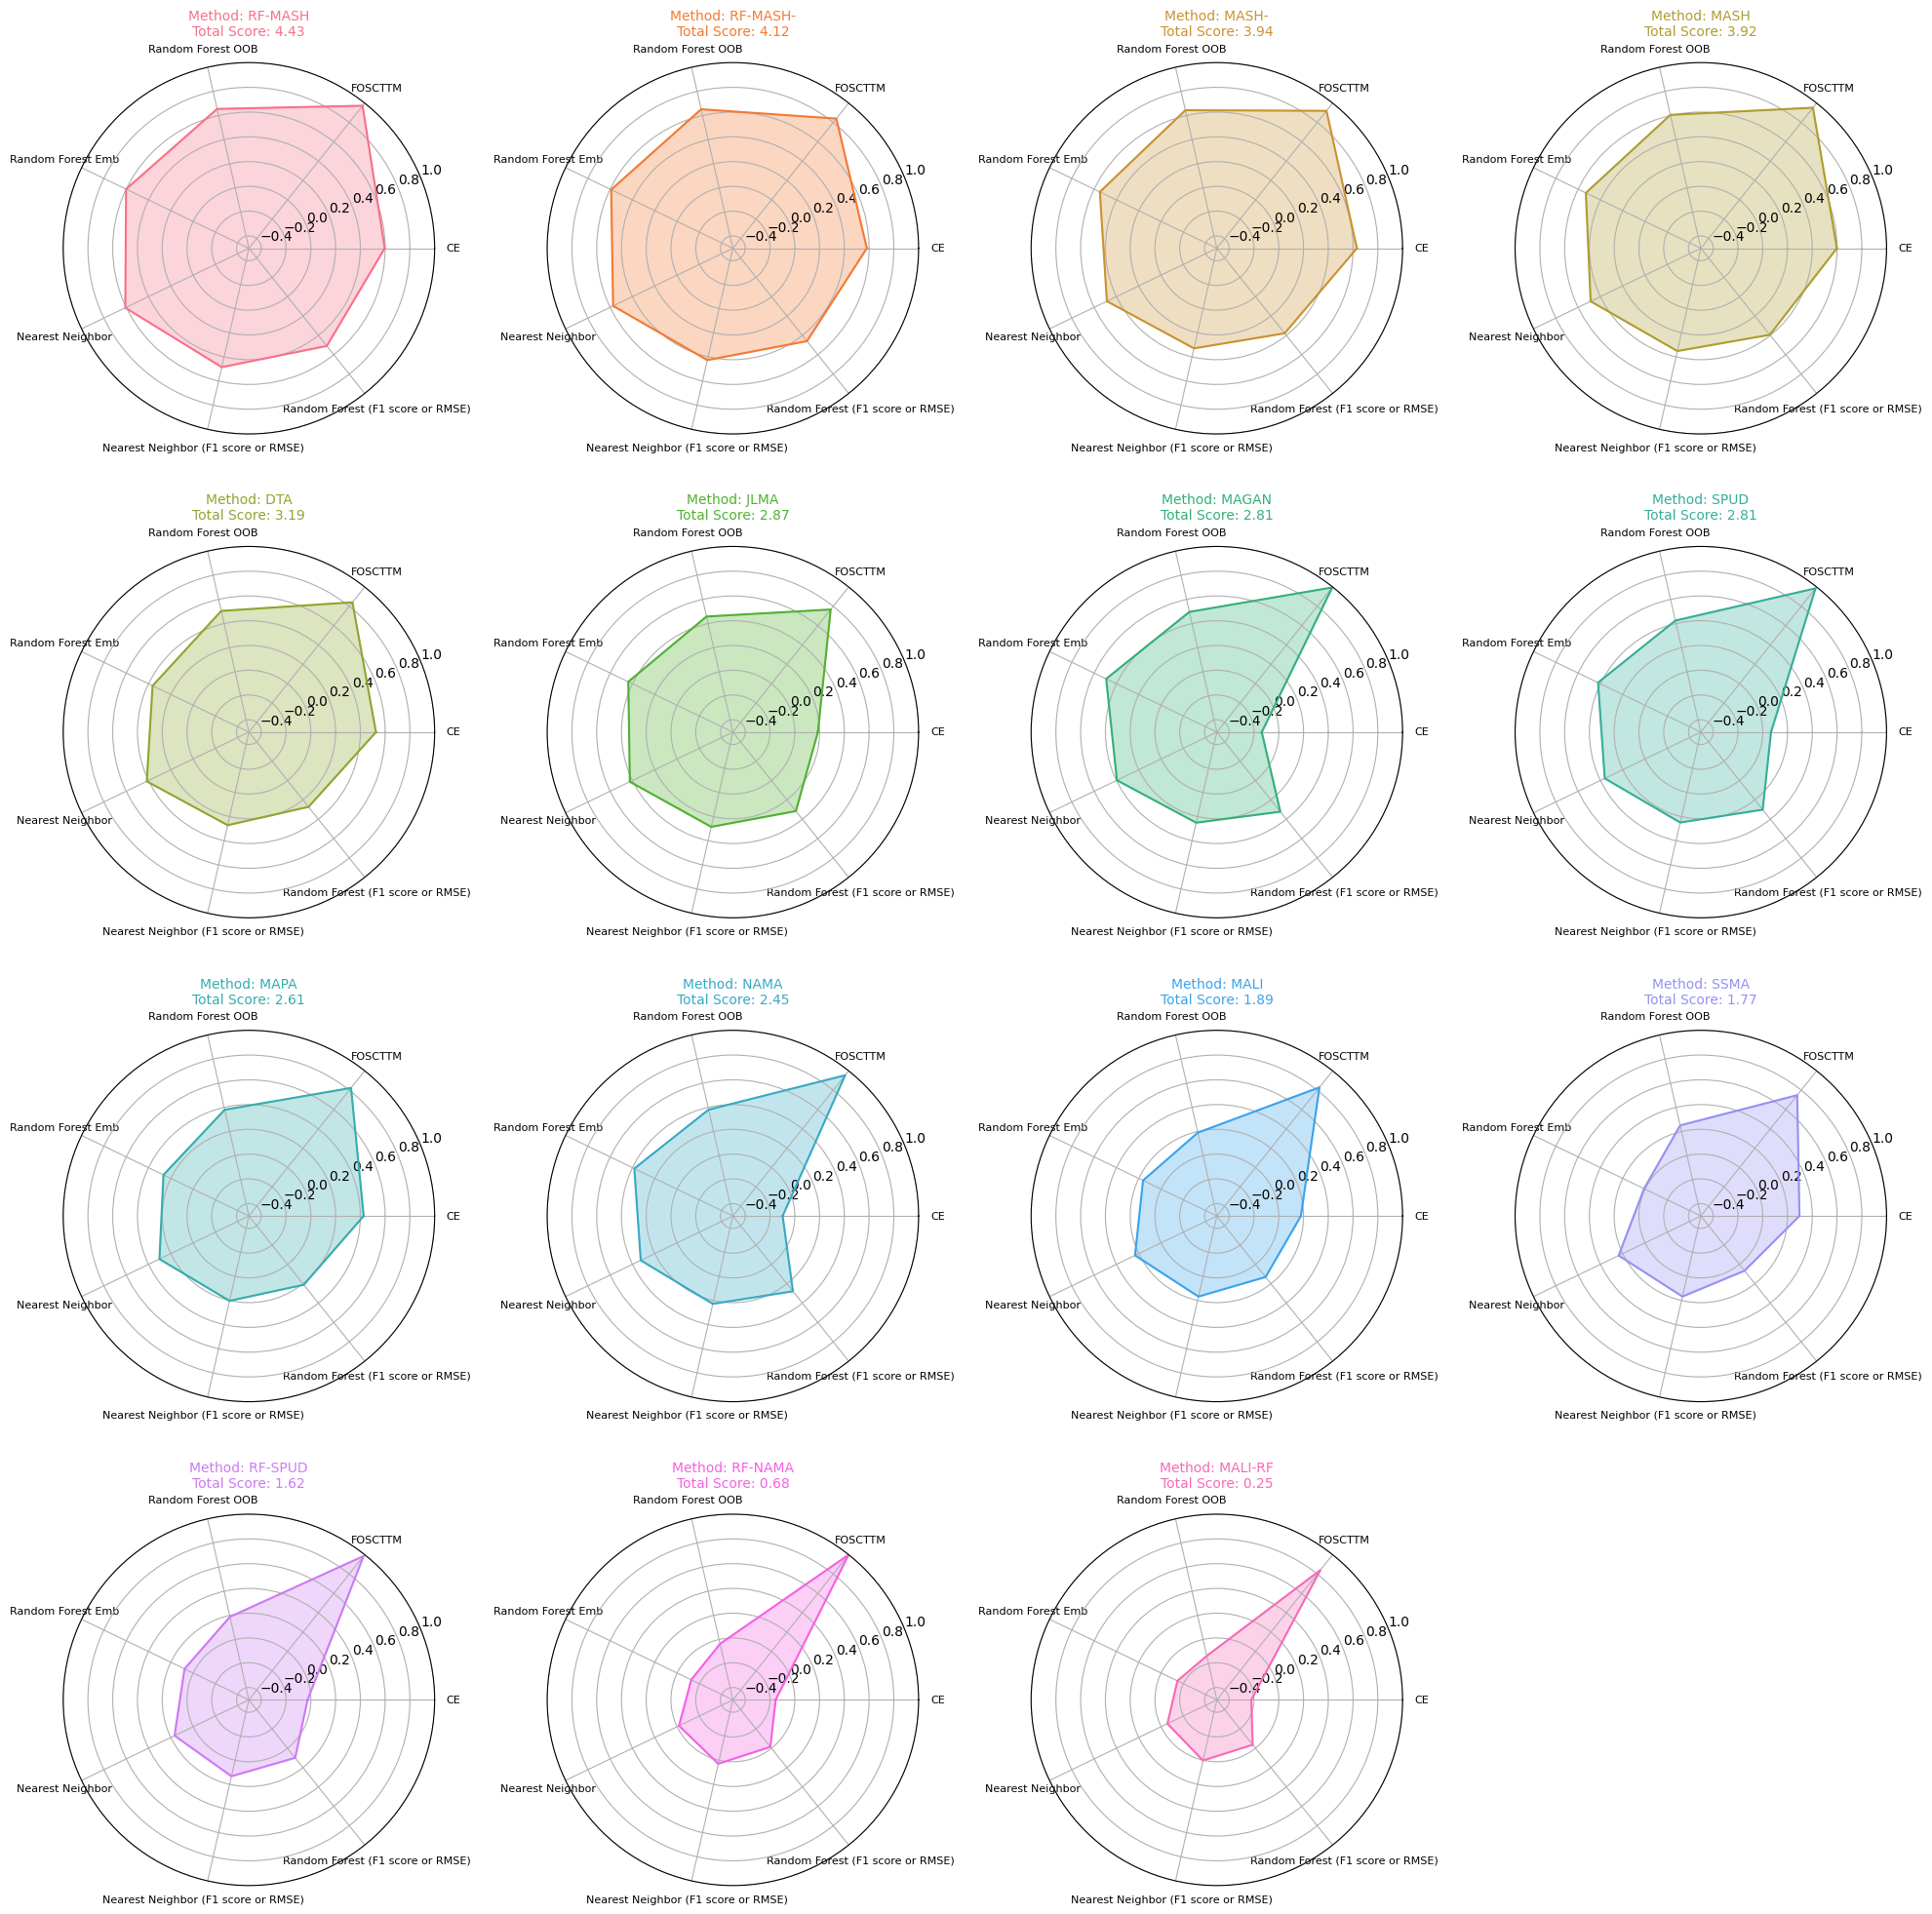

In [10]:
plot_radial(proc_reg_df, ['CE', 'FOSCTTM', 'Random Forest OOB', 'Random Forest Emb', 'Nearest Neighbor',
                          'Nearest Neighbor (F1 score or RMSE)', 'Random Forest (F1 score or RMSE)'])

## Veiw GRAE

In [11]:
proc_reg_df.sample(2)

,method,csv_file,split,Percent_of_Anchors,CE,FOSCTTM,Random Forest OOB,Random Forest Emb,Nearest Neighbor,Nearest Neighbor (F1 score or RMSE),Random Forest (F1 score or RMSE),GRAE,Combined_Metric,A_Classification_Score,B_Classification_Score
53,MAGAN,ComputerHardware,even,0.3,-0.098066,0.002667,0.487343,0.496658,0.478021,1.013551,0.995293,"{'42': {'RF-OOB': 0.5254786242267793, 'KNN': 0...",-0.100733,0.847615,0.889474
1125,RF-SPUD,AirfoilSelfNoise,distort,0.3,-0.229225,0.000049,-0.075455,-0.098785,-0.015320,0.993137,1.032917,"{'42': {'RF-OOB': -0.08125872624999686, 'KNN':...",-0.229273,0.970140,0.912151


In [12]:
grae_expanded = pd.json_normalize(proc_reg_df['GRAE'])
# Rename columns by dropping the prefix before the dot
grae_expanded.columns = ["Grae-" + col.split(".", 1)[-1] for col in grae_expanded.columns]

# Calculate mean for each unique suffix
mean_scores = grae_expanded.groupby(grae_expanded.columns, axis=1).mean()
mean_scores.sample(2)


,Grae-KNN,Grae-KNN-metric,Grae-RF,Grae-RF-OOB,Grae-RF-metric
38,0.551651,0.939349,0.672306,0.643723,0.803069
160,-0.265594,0.904528,-0.717663,0.783888,1.053616


In [13]:
full_data = proc_reg_df.drop(columns = ["GRAE"]).join(mean_scores, on = None)
full_data.sample(2)

,method,csv_file,split,Percent_of_Anchors,CE,FOSCTTM,Random Forest OOB,Random Forest Emb,Nearest Neighbor,Nearest Neighbor (F1 score or RMSE),Random Forest (F1 score or RMSE),Combined_Metric,A_Classification_Score,B_Classification_Score,Grae-KNN,Grae-KNN-metric,Grae-RF,Grae-RF-OOB,Grae-RF-metric
982,SSMA,ConcreteCompressiveStrength,skewed,0.3,0.023199,0.383882,0.095967,0.023221,0.132181,0.888354,0.942474,-0.360683,0.397069,0.953577,-0.052266,0.985677,-0.280434,0.041555,1.087303
463,RF-SPUD,OpticalNetwork,skewed,0.3,0.022399,0.000035,0.449264,-0.020282,0.029117,0.995249,1.020254,0.022364,0.862770,0.936868,0.364044,0.805493,0.126052,0.414680,0.944259


In [14]:
full_data.columns

Index(['method', 'csv_file', 'split', 'Percent_of_Anchors', 'CE', 'FOSCTTM',
       'Random Forest OOB', 'Random Forest Emb', 'Nearest Neighbor',
       'Nearest Neighbor (F1 score or RMSE)',
       'Random Forest (F1 score or RMSE)', 'Combined_Metric',
       'A_Classification_Score', 'B_Classification_Score', 'Grae-KNN',
       'Grae-KNN-metric', 'Grae-RF', 'Grae-RF-OOB', 'Grae-RF-metric'],
      dtype='object')

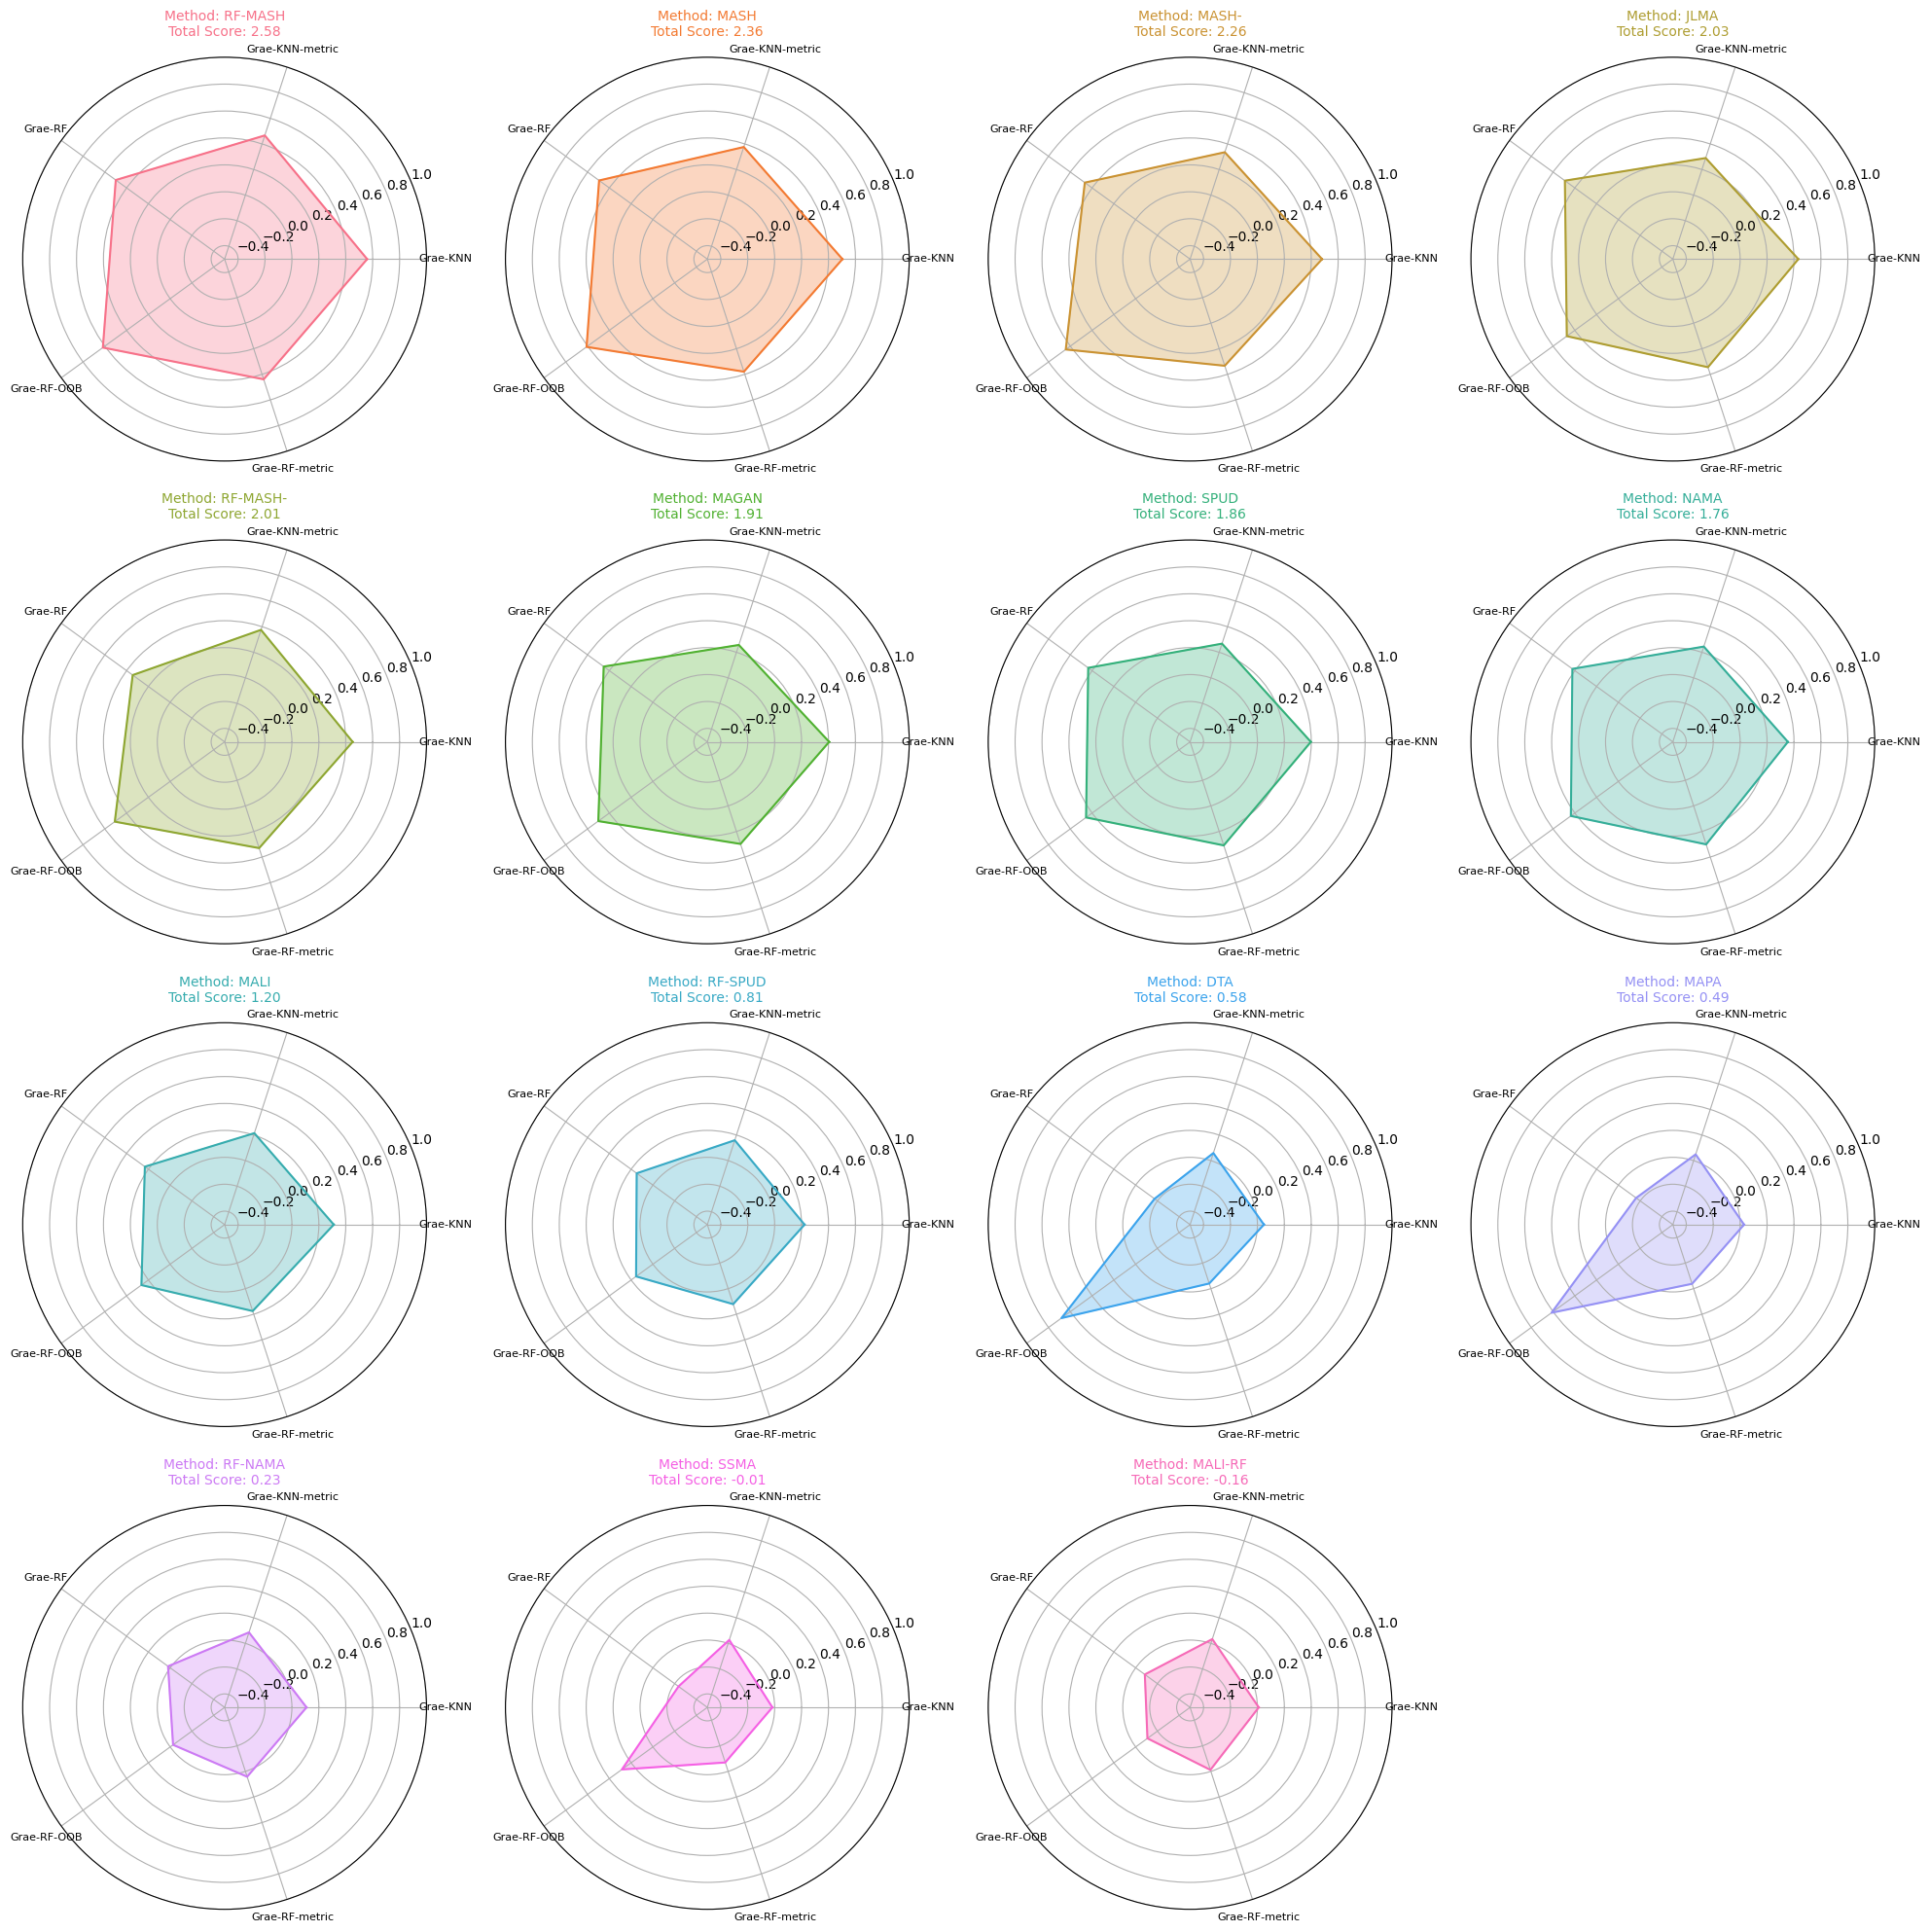

In [15]:
plot_radial(full_data, [#'CE', 'FOSCTTM', 'Random Forest OOB', 'Random Forest Emb', 'Nearest Neighbor',
                          #'Nearest Neighbor (F1 score or RMSE)', 'Random Forest (F1 score or RMSE)',
                          'Grae-KNN', 'Grae-KNN-metric', 'Grae-RF', 'Grae-RF-OOB', 'Grae-RF-metric'])

# Compare Grae to RF Extend

In [16]:
full_data.sample(2)

,method,csv_file,split,Percent_of_Anchors,CE,FOSCTTM,Random Forest OOB,Random Forest Emb,Nearest Neighbor,Nearest Neighbor (F1 score or RMSE),Random Forest (F1 score or RMSE),Combined_Metric,A_Classification_Score,B_Classification_Score,Grae-KNN,Grae-KNN-metric,Grae-RF,Grae-RF-OOB,Grae-RF-metric
447,MAGAN,OpticalNetwork,skewed,0.3,-0.147061,0.000000,0.571792,0.641533,0.452722,0.747226,0.604745,-0.147061,0.862770,0.936868,0.386233,0.791316,0.411650,0.525394,0.774758
906,DTA,ConcreteSlumpTest,turn,0.3,0.893098,0.002205,0.629340,0.287801,0.303668,0.780537,0.786176,0.890893,0.915846,0.915846,0.227376,0.797552,0.044765,0.982309,0.886856


In [17]:
group_df = full_data.drop(columns = ["csv_file", "split", "Percent_of_Anchors", "A_Classification_Score", "B_Classification_Score"]).groupby(by = "method").mean()
group_df#.plot( )

,CE,FOSCTTM,Random Forest OOB,Random Forest Emb,Nearest Neighbor,Nearest Neighbor (F1 score or RMSE),Random Forest (F1 score or RMSE),Combined_Metric,Grae-KNN,Grae-KNN-metric,Grae-RF,Grae-RF-OOB,Grae-RF-metric
method,,,,,,,,,,,,,
DTA,0.526154,0.158615,0.504363,0.363444,0.415754,0.728815,0.727622,0.367539,0.048444,0.941068,-0.173486,0.681460,1.040180
JLMA,0.186421,0.233162,0.457888,0.437567,0.423654,0.715125,0.683981,-0.046741,0.432510,0.710533,0.491310,0.473705,0.655668
MAGAN,-0.137117,0.005045,0.496355,0.492037,0.395875,0.749463,0.677680,-0.142162,0.405048,0.743055,0.451868,0.501451,0.702729
MALI,0.178812,0.170847,0.190649,0.161692,0.233467,0.832154,0.869305,0.007964,0.310919,0.785421,0.232252,0.263916,0.824874
MALI-RF,-0.221639,0.159383,-0.135309,-0.146295,-0.056911,0.997538,1.035854,-0.381022,0.010183,0.966548,-0.084242,-0.108333,1.011635
MAPA,0.426809,0.177010,0.380295,0.265833,0.301906,0.796659,0.789241,0.249799,0.029179,0.951236,-0.162821,0.614079,1.037673
MASH,0.599106,0.047638,0.605203,0.530895,0.487680,0.648251,0.606093,0.551467,0.503620,0.624433,0.494041,0.609399,0.620833
MASH-,0.630821,0.079888,0.643968,0.548831,0.485734,0.670497,0.621386,0.550933,0.480437,0.665048,0.466852,0.641863,0.666920
NAMA,-0.098088,0.045877,0.380997,0.383521,0.325752,0.771800,0.721855,-0.143965,0.354679,0.755690,0.422478,0.436465,0.699235


In [18]:
group_df.columns, group_df.index

(Index(['CE', 'FOSCTTM', 'Random Forest OOB', 'Random Forest Emb',
        'Nearest Neighbor', 'Nearest Neighbor (F1 score or RMSE)',
        'Random Forest (F1 score or RMSE)', 'Combined_Metric', 'Grae-KNN',
        'Grae-KNN-metric', 'Grae-RF', 'Grae-RF-OOB', 'Grae-RF-metric'],
       dtype='object'),
 Index(['DTA', 'JLMA', 'MAGAN', 'MALI', 'MALI-RF', 'MAPA', 'MASH', 'MASH-',
        'NAMA', 'RF-MASH', 'RF-MASH-', 'RF-NAMA', 'RF-SPUD', 'SPUD', 'SSMA'],
       dtype='object', name='method'))

In [19]:
rf_extend = group_df[['Random Forest OOB', 'Random Forest Emb', 'Nearest Neighbor', 'Nearest Neighbor (F1 score or RMSE)', 'Random Forest (F1 score or RMSE)']]  
grae = group_df[['Grae-KNN', 'Grae-KNN-metric', 'Grae-RF', 'Grae-RF-OOB', 'Grae-RF-metric']]

In [20]:
dif_values = rf_extend.values - grae.values

diff_df = pd.DataFrame(dif_values, index = group_df.index, columns = rf_extend.columns)
diff_df["Nearest Neighbor (F1 score or RMSE)"] = diff_df["Nearest Neighbor (F1 score or RMSE)"] * -1
diff_df["Random Forest (F1 score or RMSE)"] = diff_df["Random Forest (F1 score or RMSE)"] * -1 #To ensure that they are consistent on same side.

diff_df

,Random Forest OOB,Random Forest Emb,Nearest Neighbor,Nearest Neighbor (F1 score or RMSE),Random Forest (F1 score or RMSE)
method,,,,,
DTA,0.455920,-0.577624,0.589240,-0.047354,0.312557
JLMA,0.025378,-0.272966,-0.067656,-0.241420,-0.028313
MAGAN,0.091307,-0.251018,-0.055993,-0.248012,0.025049
MALI,-0.120270,-0.623730,0.001216,-0.568238,-0.044431
MALI-RF,-0.145491,-1.112843,0.027331,-1.105871,-0.024218
MAPA,0.351116,-0.685403,0.464726,-0.182580,0.248432
MASH,0.101583,-0.093538,-0.006361,-0.038852,0.014740
MASH-,0.163531,-0.116217,0.018882,-0.028634,0.045535
NAMA,0.026318,-0.372168,-0.096726,-0.335334,-0.022620


<Axes: xlabel='method'>

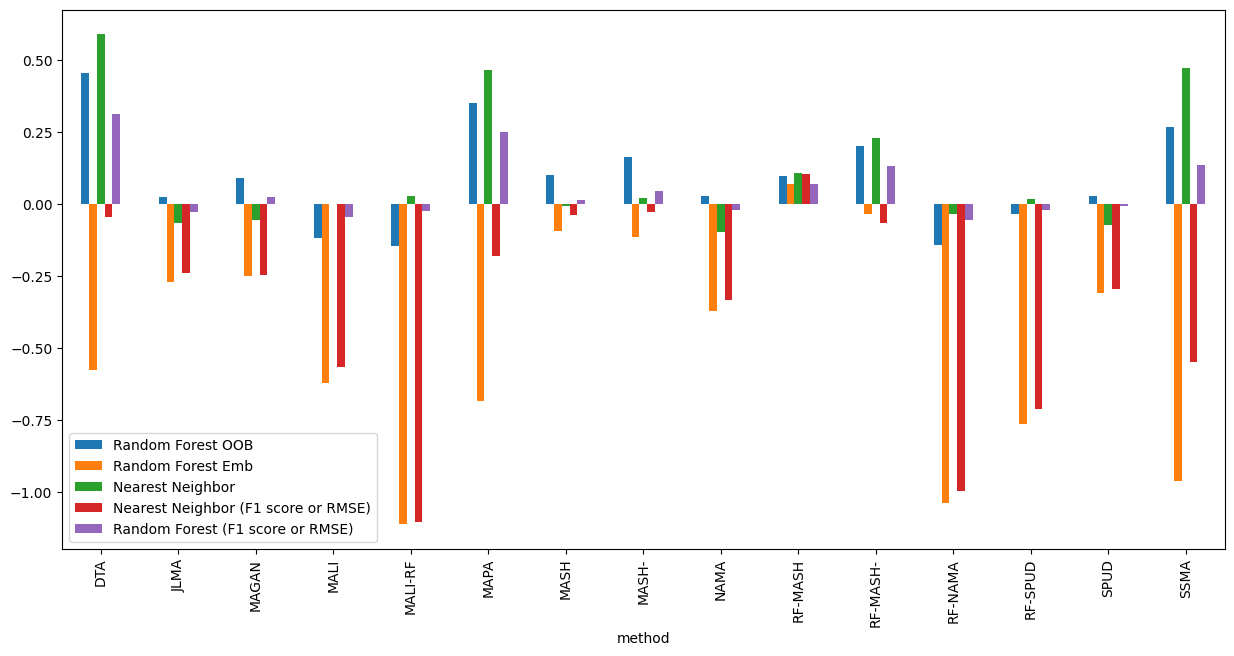

In [21]:
"""
Note that this below isn't really an assesment of how well each method did, but how different Grae is from the non-Grae
Also note that the RMSE is multiplied by -1 so that the bar is on the side where the method is more favorable for it
"""
diff_df.plot(kind = "bar", figsize=(15,7)) # Calculated Non-Grae verisons - Grae_versions

# Veiw Feature variance

In [22]:
reg_df = read_json_files_to_dataframe("/yunity/arusty/Graph-Manifold-Alignment/Results/RegressionData")

#Average out the random seeds
reg_df["CE"] = [np.mean(list(d.values())) for d in reg_df["CE"].values]
reg_df["FOSCTTM"] = [np.mean(list(d.values())) for d in reg_df["FOSCTTM"].values]
reg_df["Combined_Metric"] = reg_df["CE"] - reg_df["FOSCTTM"]
reg_df.sample(2)

,method,csv_file,split,Percent_of_Anchors,Best_Params,CE,FOSCTTM,Random Forest OOB,Random Forest Emb,Nearest Neighbor,Nearest Neighbor (F1 score or RMSE),Random Forest (F1 score or RMSE),GRAE,Parameter STD,Combined_Metric
998,SPUD,ConcreteCompressiveStrength,random,0.3,"{'knn': 86, 'OD_method': 'absolute_distance', ...",-0.446765,0.002815,"{'42': 0.21701876864286096, '1738': 0.41323695...","{'42': 0.18885412915408584, '1738': 0.43041503...","{'42': 0.08143339350365786, '1738': 0.20437929...","{'42': 0.9209314327136663, '1738': 0.881722119...","{'42': 0.8654090861581741, '1738': 0.746032855...","{'42': {'RF-OOB': 0.26236563012996583, 'KNN': ...","{'knn': 0.21743262689259685, 'OD_method': 0.03...",-0.449580
4,MALI,ComputerHardware,distort,0.3,"{'knn': 2, 'mu': 0.5, 't': 3, 'transition_only...",0.851472,0.013905,"{'42': 0.6046880534297552, '1738': 0.774361137...","{'42': 0.7362282323449918, '1738': 0.632940856...","{'42': 0.7246075256419222, '1738': 0.491344607...","{'42': 0.7361988224259177, '1738': 0.435464812...","{'42': 0.7204987625524782, '1738': 0.369921237...","{'42': {'RF-OOB': 0.5613369479352999, 'KNN': 0...",{},0.837566


### Spud Parameters on STD

In [23]:
spud_param_df = pd.DataFrame(list(reg_df[reg_df["method"] == "SPUD"]["Parameter STD"].values))
spud_param_df

,knn,OD_method,agg_method
0,0.293544,0.106728,0.328006
1,0.315521,0.136929,0.113630
2,0.299420,0.038904,0.179496
3,0.257186,0.017215,0.020762
4,0.251965,0.055214,0.303049
...,...,...,...
205,0.303843,0.137920,0.086527
206,0.245030,0.052678,0.133933
207,0.589315,0.178530,0.034385
208,0.222530,0.223938,0.006242


<Axes: >

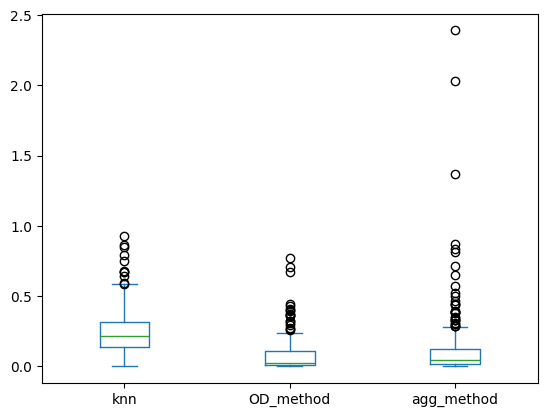

In [24]:
spud_param_df.plot(kind = "box") #This is showing how the std fluctuates between datasets

## MASH Parameters on STD

In [25]:
mash_minus_param_df = pd.DataFrame(list(reg_df[reg_df["method"] == "MASH-"]["Parameter STD"].values))
mash_minus_param_df

,knn,page_rank,DTM,density_normalization
0,0.047943,0.000929,0.017838,0.0
1,0.092486,0.003621,0.056183,0.0
2,0.141639,0.008092,0.227741,0.0
3,0.191730,0.005466,0.008328,0.0
4,0.095779,0.125204,0.023997,0.0
5,0.165841,0.004503,0.056278,0.0
6,0.238521,0.004086,0.119055,0.0
7,0.072989,0.005271,0.031873,0.0
8,0.098384,0.001412,0.023795,0.0
9,0.082578,0.008718,0.034997,0.0


<Axes: >

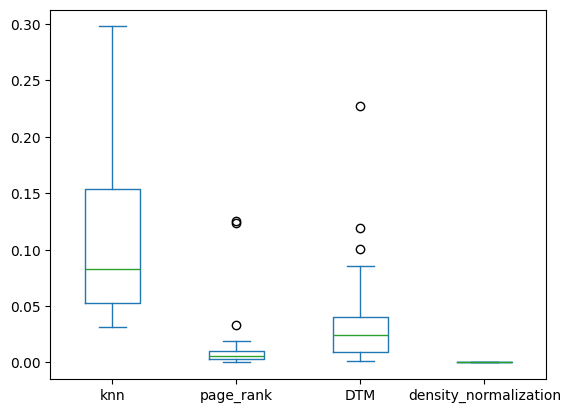

In [26]:
mash_minus_param_df.plot(kind = "box") #This is showing how the std fluctuates between datasets

In [27]:
mash_param_df = pd.DataFrame(list(reg_df[reg_df["method"] == "MASH"]["Parameter STD"].values))
mash_param_df

,connection_limit,threshold,epochs
0,0.000000,0.000000,0.000000e+00
1,0.006181,0.032061,0.000000e+00
2,0.000000,0.000000,1.387779e-17
3,0.000000,0.000000,0.000000e+00
4,0.000000,0.000000,1.110223e-16
5,0.000000,0.000000,0.000000e+00
6,0.027128,0.181281,0.000000e+00
7,0.000000,0.071388,0.000000e+00
8,0.009295,0.022181,1.110223e-16
9,0.000000,0.000000,0.000000e+00


<Axes: >

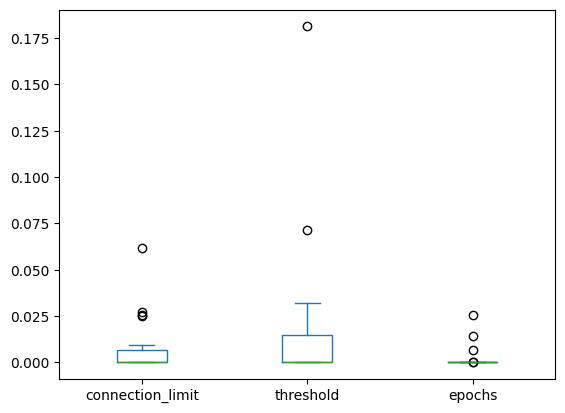

In [28]:
mash_param_df.plot(kind = "box") 